In [40]:
import seaborn as sns
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [41]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [42]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4772
0     207
Name: color_0_ou_1, dtype: int64

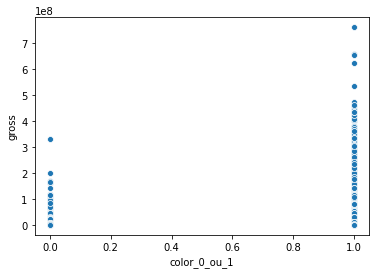

In [43]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


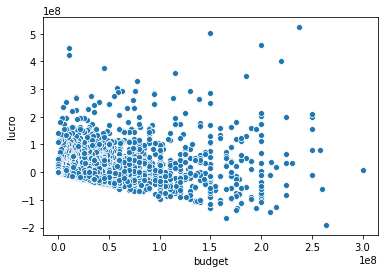

In [44]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

In [45]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


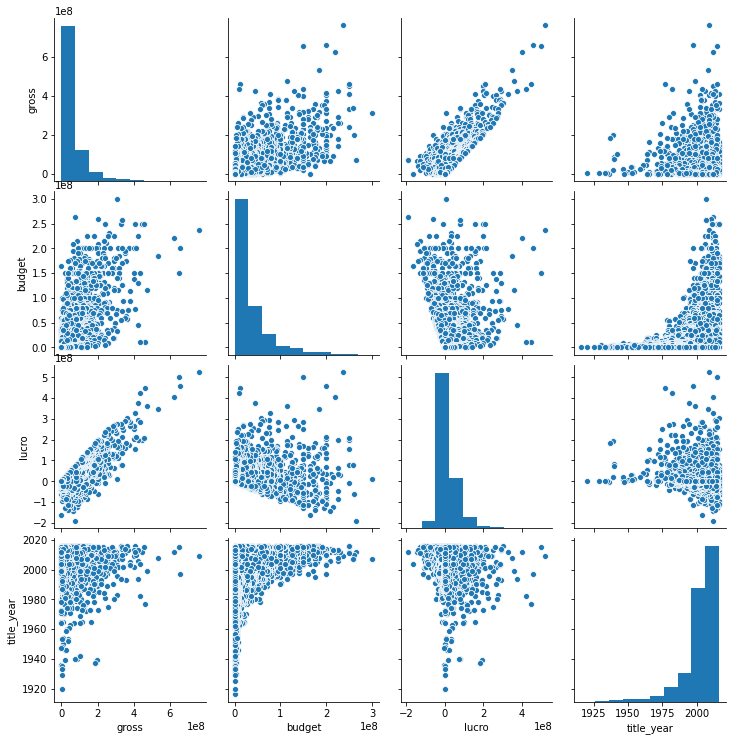

In [46]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

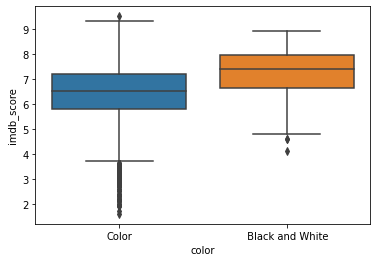

In [47]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

Os filmes preto e branco (Black and White) tem as melhores avaliações pois geralmente são filmes antigos e poucas pessoas assistiram

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [48]:
imdb_usa.sort_values('lucro').head(10)['lucro']

5      -190641321.0
91     -164334574.0
28     -143826840.0
85     -136702695.0
49     -129828140.0
62     -128624673.0
143    -128620685.0
14     -125710090.0
145    -115035182.0
3879   -115035182.0
Name: lucro, dtype: float64

In [49]:
imdb_usa.sort_values('lucro').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [50]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


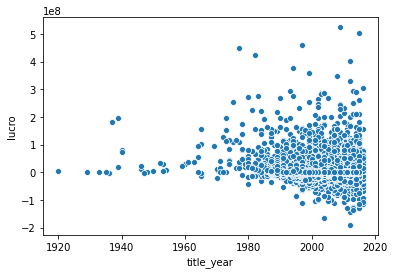

In [51]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [52]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
pre_war[['movie_title', 'lucro']].head(10)

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0
4706,Top Hat,2391000.0
4786,42nd Street,1861000.0
4427,Modern Times,-1336755.0


Houve 2 filmes que tiveram lucro muito alto:



In [53]:
pre_war[['movie_title', 'lucro']].head(2)

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

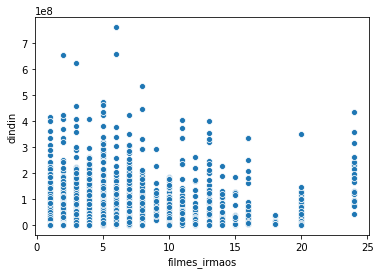

In [54]:
import matplotlib.pyplot as plt

sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [55]:
gross_director[(gross_director['filmes_irmaos'] > 16) & (gross_director['filmes_irmaos'] < 20)]

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

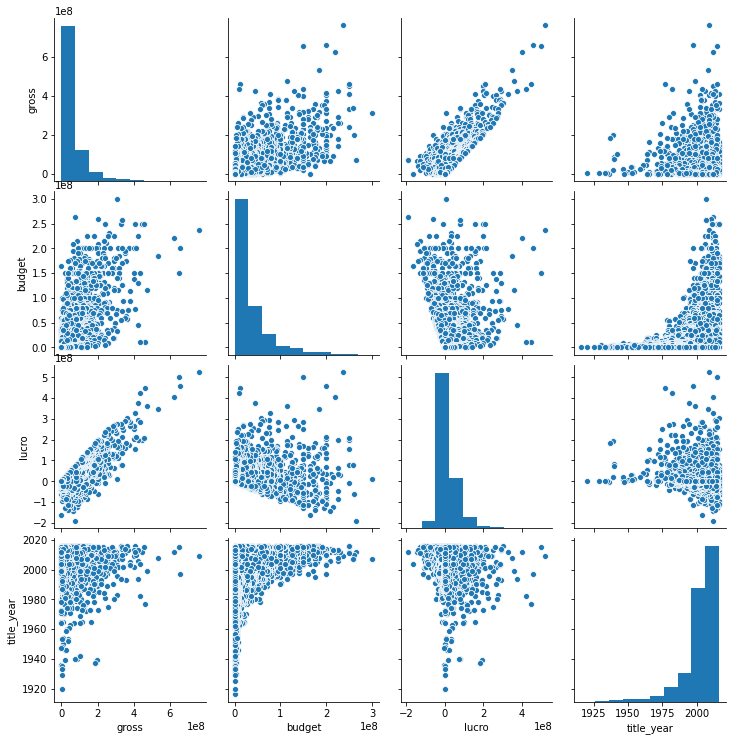

In [56]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

Comparando o anos (title_year) com o lucro percebe que os filmes mais recente pode ter bastante lucro ou prejuizo comparado aos filmes antigos. O mesmo vale para despesas (budget) que os filmes mais recente tem bastante

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [57]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

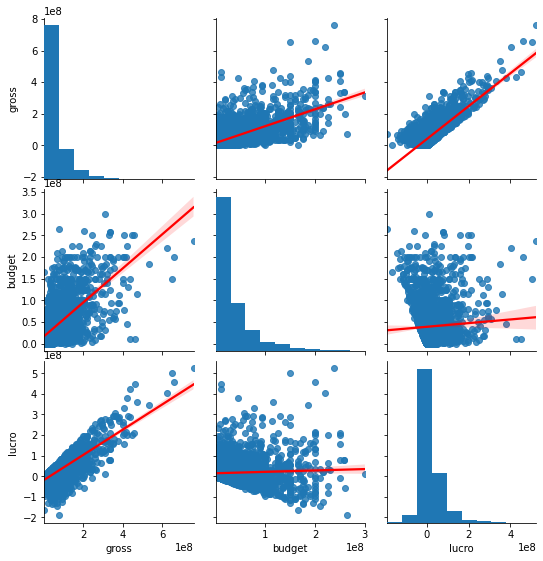

In [58]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro"]], kind="reg", plot_kws={'line_kws':{'color':'red'}})

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


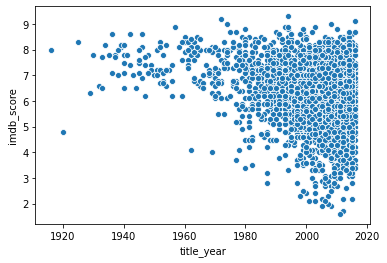

In [59]:
sns.scatterplot(x="title_year", y="imdb_score", data = imdb_usa[["imdb_score", "title_year"]])

Os filmes antigos tem menos notas que os filmes mais recentes, mas as notas dos filmes antigos são notas boas